In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'final-3:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4447545%2F7632615%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240215%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240215T185349Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D104baf1681d683b7ff21b4a4a24b7d1762fe95ed22a795ee49fc5cae42271b2c53a1373855bf828df008e8c69a48ba653fc669c242a8eb614d694c1704d2af6f446b821bf940455749bf513e149de085d84e353cbdaadfdaed02465e2217fc3e0a31c18192c369a8115bdb10bbb7f376165c23d08d9f8b47545b78677e7f86d92f6e65d64dad5c05f585d18640972d1f6d4f9d6150a76de0c7099c1fda1f7f2ebadb9fe0558597fa20aaf8b6d5a870935aeffb0a748c5f853b95eea63e55125f0f23791919ad4b3e0b79fdc70b75d054b8878672addb1661562f1d81c6d03eba6665261aa99292809fac41b9c9fe8b337f9bb8953ba208b748b94dbb4c536369'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 24346 bytes downloaded
Downloaded and uncompressed: final-3
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/final-3/final_3.xlsx


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from PIL import Image
import itertools

In [ ]:
data0 = pd.read_excel("/kaggle/input/final-3/final_3.xlsx", sheet_name='data')
data0

,state_ut,nsdp_per_capita,literacy_rate(ratio),internet_penetration(ratio),smartphone_penetration(ratio),bank_density(ratio),atm_density(ratio),transaction_density(ratio)
0,Andaman & Nicobar,229080.0,0.928,1.0516,NaN,0.008850,0.015275,9.170677
1,Andhra Pradesh,192587.0,0.720,0.6399,0.849,0.048930,0.074849,30.043409
2,Arunachal Pradesh,205645.0,0.841,0.5250,0.796,0.002317,0.003630,9.358350
3,Assam,102965.0,0.775,0.5124,0.711,0.040427,0.061807,5.425256
4,Bihar,47498.0,0.746,0.3989,0.641,0.084970,0.101144,7.292967
5,Chandigarh,333932.0,0.927,1.0958,NaN,4.149123,6.543860,10.788041
6,Chhattisgarh,120704.0,0.782,0.5282,0.767,0.023041,0.033597,10.665220
7,Daman and Diu and Dadra and Nagar Haveli,NaN,0.874,0.6116,NaN,0.174419,0.500000,28.119428
8,Goa,472070.0,0.950,1.4451,NaN,0.184495,0.286332,21.245065
9,Gujarat,241930.0,0.853,0.7461,0.960,0.046972,0.073164,7.469417


In [ ]:
data0.shape

(36, 8)

In [ ]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state_ut                       36 non-null     object 
 1   nsdp_per_capita                34 non-null     float64
 2   literacy_rate(ratio)           36 non-null     float64
 3   internet_penetration(ratio)    36 non-null     float64
 4   smartphone_penetration(ratio)  28 non-null     float64
 5   bank_density(ratio)            36 non-null     float64
 6   atm_density(ratio)             36 non-null     float64
 7   transaction_density(ratio)     36 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.4+ KB


In [ ]:
data0.describe()

,nsdp_per_capita,literacy_rate(ratio),internet_penetration(ratio),smartphone_penetration(ratio),bank_density(ratio),atm_density(ratio),transaction_density(ratio)
count,34.000000,36.000000,36.000000,28.000000,36.000000,36.000000,36.000000
mean,196808.882353,0.853306,0.780600,0.807643,0.277070,0.469566,12.219380
std,103388.625921,0.074617,0.283704,0.110455,0.800936,1.364134,11.341246
min,47498.000000,0.720000,0.398900,0.617000,0.000547,0.001006,0.655662
25%,120991.000000,0.791250,0.577900,0.705250,0.024995,0.033994,5.152920
50%,195774.500000,0.856500,0.729750,0.838500,0.047102,0.067485,9.264513
75%,242172.250000,0.915000,0.879500,0.897000,0.115317,0.163122,16.029581
max,472070.000000,0.994000,1.748100,0.976000,4.149123,6.543860,53.053877


<ipython-input-8-34d62b734627>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states['transaction_density(ratio)'],y=top_states['state_ut'],data=top_states,palette='YlGnBu_r')


<Axes: xlabel='transaction_density(ratio)', ylabel='state_ut'>

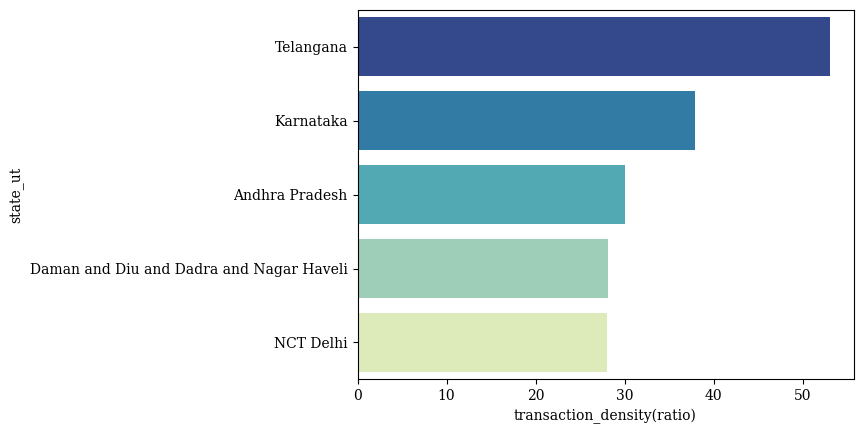

In [ ]:
plt.rcParams['font.family'] = 'serif'
top_states = data0.sort_values(by='transaction_density(ratio)', ascending=False).head(5)
sns.barplot(x=top_states['transaction_density(ratio)'],y=top_states['state_ut'],data=top_states,palette='YlGnBu_r')

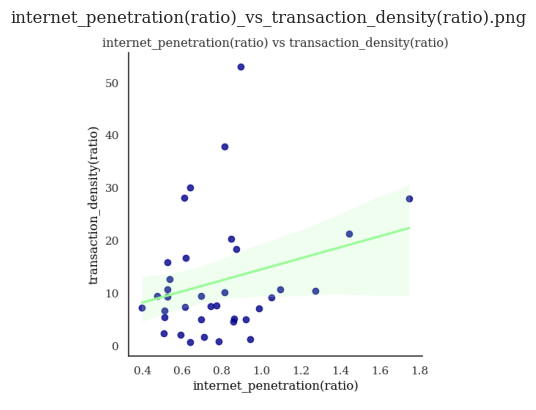

In [ ]:
# Creating individual plots
target_column = 'transaction_density(ratio)'
other_columns = [col for col in data0.columns if col not in ['transaction_density(ratio)', 'state_ut']]

# Create a folder to save the PNG files
output_folder = 'output_plots/'
os.makedirs(output_folder, exist_ok=True)
sns.set(context="notebook", style="white", palette="deep", font="serif", font_scale=1, color_codes=True, rc=None)

for column in other_columns:
    plot = sns.lmplot(x=column, y=target_column, data=data0, scatter_kws={'color': 'darkblue'}, line_kws={'color': 'palegreen'})
    plot.set_axis_labels(x_var=column, y_var=target_column, color='black')
    plt.title(f'{column} vs {target_column}')
    output_path = os.path.join(output_folder, f'{column}_vs_{target_column}.png')
    plot.savefig(output_path)
    plt.close()

# Display the saved PNG files
for file_name in os.listdir(output_folder):
    if file_name.endswith(".png"):
        file_path = os.path.join(output_folder, file_name)
        img = plt.imread(file_path)
        plt.imshow(img)
        plt.title(file_name)
        plt.axis('off')

In [ ]:
# creating a collage of individual plots
# Path to the folder containing the output PNG files
output_folder = 'output_plots/'

# List all PNG files in the folder
png_files = [file for file in os.listdir(output_folder) if file.endswith('.png')]

# Set up the collage layout
collage_width = 2  # Number of images in each row
collage_height = (len(png_files) + 1) // collage_width + 1  # Calculate the number of rows, adding 1 for the last row

# Adjust the width and height of each individual image
individual_width = 300
individual_height = 200
spacing_between_rows = 20  # Adjust the spacing between rows

# Create a blank white image for the collage
collage = Image.new('RGB', (collage_width * individual_width, collage_height * (individual_height + spacing_between_rows)), 'white')

# Iterate through PNG files, resize each image, and paste them into the collage
for i, png_file in enumerate(png_files):
    # Open each PNG file
    img = Image.open(os.path.join(output_folder, png_file))

    # Resize each image
    img = img.resize((individual_width, individual_height))

    # Calculate the position in the collage with increased spacing between rows
    x = (i % collage_width) * individual_width
    y = (i // collage_width) * (individual_height + spacing_between_rows)

    # Paste the resized image into the collage
    collage.paste(img, (x, y))

# Calculate the position for the center image in the last row with increased spacing
center_x = ((collage_width - 1) // 2) * individual_width
center_y = collage_height * (individual_height + spacing_between_rows)

# Open the missing image and resize
missing_img = Image.open(os.path.join(output_folder, 'bank_density(ratio)_vs_transaction_density(ratio).png'))
missing_img = missing_img.resize((individual_width, individual_height))

# Paste the center image into the collage with increased spacing
collage.paste(missing_img, (center_x, center_y))

# Save the collage as a PNG file
collage.save('output_collage_with_spacing.png')

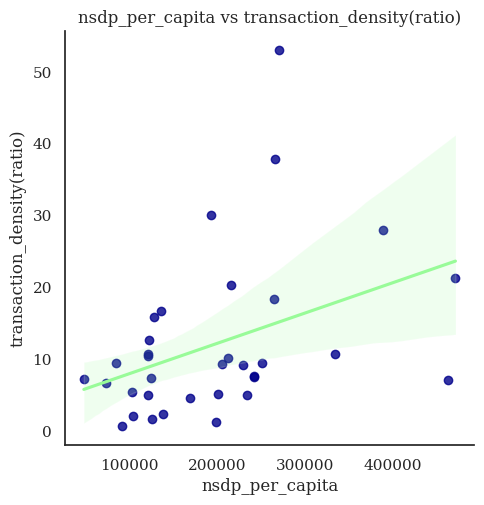

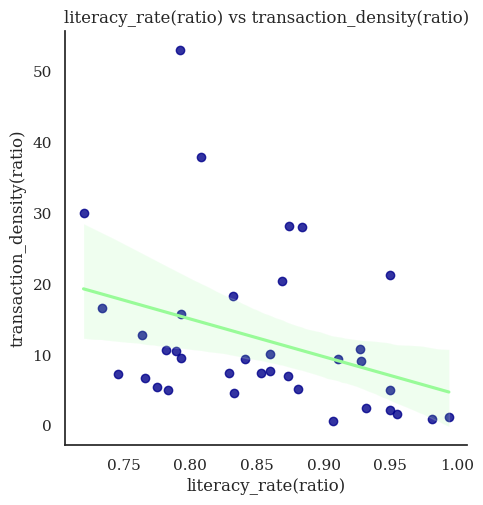

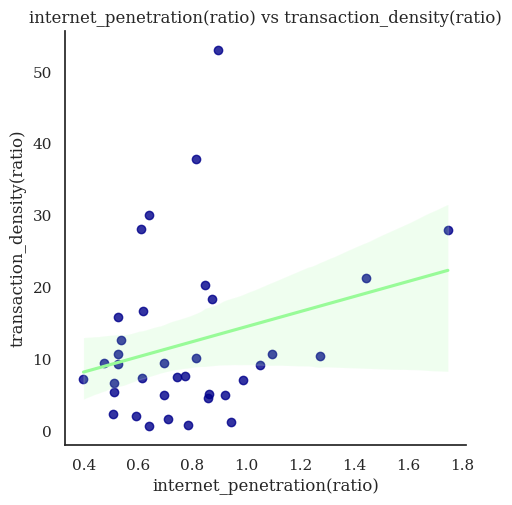

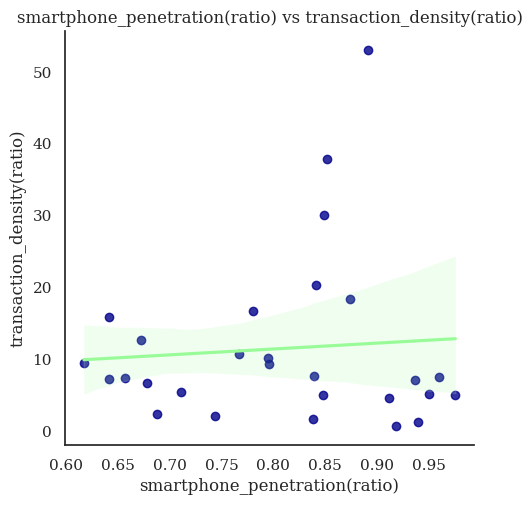

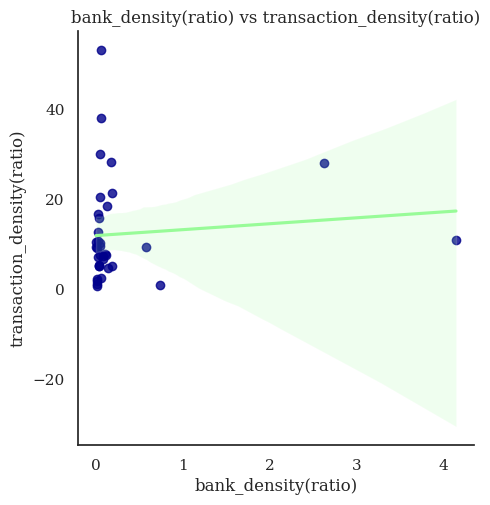

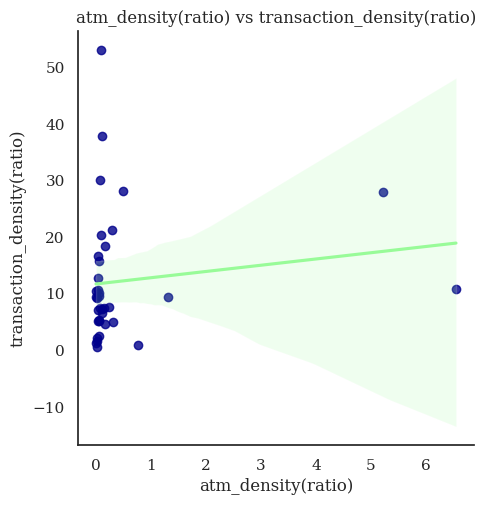

In [ ]:
target_column = 'transaction_density(ratio)'

other_columns = [col for col in data0.columns if col not in ['transaction_density(ratio)','state_ut']]

for column in other_columns:
    sns.lmplot(x=column, y=target_column, data=data0, scatter_kws={'color': 'darkblue'}, line_kws={'color': 'palegreen'})
    plt.title(f'{column} vs {target_column}')
    plt.show()

<ipython-input-12-417f4d295422>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  colorbar.ax.set_yticklabels(colorbar.ax.get_yticklabels(), fontdict={'family': 'serif', 'size': 10,'color':'black'})


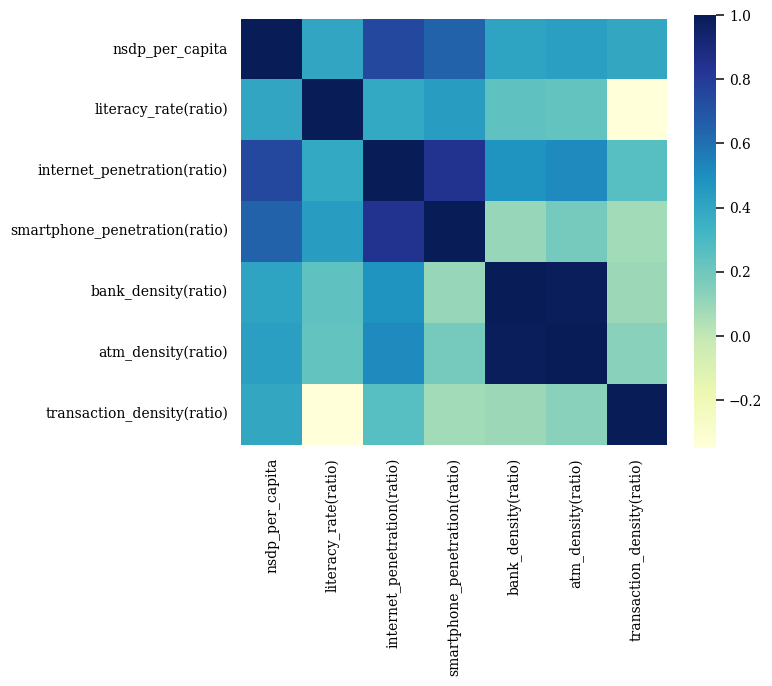

In [ ]:
data1 = data0.drop(columns=['state_ut'])
cor=data1.corr()
plt.figure(figsize=(8, 8))
cormap = sns.heatmap(cor, cmap='YlGnBu', square=True, cbar_kws={"shrink": 0.73})
cormap.set_xticklabels(cormap.get_xticklabels(), fontfamily="serif", fontsize=10, color='black')
cormap.set_yticklabels(cormap.get_yticklabels(), fontfamily="serif", fontsize=10, color='black')
colorbar = cormap.collections[0].colorbar
colorbar.ax.set_yticklabels(colorbar.ax.get_yticklabels(), fontdict={'family': 'serif', 'size': 10,'color':'black'})
plt.tight_layout()
plt.savefig('cormap.png')

In [ ]:
cor

,nsdp_per_capita,literacy_rate(ratio),internet_penetration(ratio),smartphone_penetration(ratio),bank_density(ratio),atm_density(ratio),transaction_density(ratio)
nsdp_per_capita,1.000000,0.399580,0.746937,0.649889,0.405826,0.425606,0.389026
literacy_rate(ratio),0.399580,1.000000,0.386137,0.446033,0.244853,0.231781,-0.349887
internet_penetration(ratio),0.746937,0.386137,1.000000,0.845803,0.480644,0.518563,0.262492
smartphone_penetration(ratio),0.649889,0.446033,0.845803,1.000000,0.101519,0.187650,0.076399
bank_density(ratio),0.405826,0.244853,0.480644,0.101519,1.000000,0.990617,0.092714
atm_density(ratio),0.425606,0.231781,0.518563,0.187650,0.990617,1.000000,0.132758
transaction_density(ratio),0.389026,-0.349887,0.262492,0.076399,0.092714,0.132758,1.000000


In [ ]:
x_data_0 = pd.read_excel("/kaggle/input/final-3/final_3.xlsx", sheet_name='X')

In [ ]:
# impute null values for smartphone_penetration
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
column_values = x_data_0['smartphone_penetration(ratio)'].values.reshape(-1, 1)
imputed_values = imputer.fit_transform(column_values)
x_data_0['smartphone_penetration(ratio)'] = imputed_values
x_data_0

,nsdp_per_capita,literacy_rate(ratio),internet_penetration(ratio),smartphone_penetration(ratio),bank_density(ratio),atm_density(ratio)
0,229080.0,0.928,1.0516,0.807643,0.008850,0.015275
1,192587.0,0.720,0.6399,0.849000,0.048930,0.074849
2,205645.0,0.841,0.5250,0.796000,0.002317,0.003630
3,102965.0,0.775,0.5124,0.711000,0.040427,0.061807
4,47498.0,0.746,0.3989,0.641000,0.084970,0.101144
5,333932.0,0.927,1.0958,0.807643,4.149123,6.543860
6,120704.0,0.782,0.5282,0.767000,0.023041,0.033597
7,NaN,0.874,0.6116,0.807643,0.174419,0.500000
8,472070.0,0.950,1.4451,0.807643,0.184495,0.286332
9,241930.0,0.853,0.7461,0.960000,0.046972,0.073164


In [ ]:
x_data_0.loc[16, 'nsdp_per_capita'] = 120790.0

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
column_values = x_data_0['nsdp_per_capita'].values.reshape(-1, 1)
imputed_values = imputer.fit_transform(column_values)
x_data_0['nsdp_per_capita'] = imputed_values
x_data_0

,nsdp_per_capita,literacy_rate(ratio),internet_penetration(ratio),smartphone_penetration(ratio),bank_density(ratio),atm_density(ratio)
0,229080.000000,0.928,1.0516,0.807643,0.008850,0.015275
1,192587.000000,0.720,0.6399,0.849000,0.048930,0.074849
2,205645.000000,0.841,0.5250,0.796000,0.002317,0.003630
3,102965.000000,0.775,0.5124,0.711000,0.040427,0.061807
4,47498.000000,0.746,0.3989,0.641000,0.084970,0.101144
5,333932.000000,0.927,1.0958,0.807643,4.149123,6.543860
6,120704.000000,0.782,0.5282,0.767000,0.023041,0.033597
7,196808.882353,0.874,0.6116,0.807643,0.174419,0.500000
8,472070.000000,0.950,1.4451,0.807643,0.184495,0.286332
9,241930.000000,0.853,0.7461,0.960000,0.046972,0.073164


In [ ]:
y0 = pd.read_excel("/kaggle/input/final-3/final_3.xlsx", sheet_name='Y')
y1 = y0.astype(np.float64)
y1 = np.log(y1)
y1

,transaction_density(ratio)
0,2.216011
1,3.402643
2,2.236269
3,1.691065
4,1.986910
5,2.378438
6,2.366988
7,3.336461
8,3.056125
9,2.010817


In [ ]:
x_data_0.reset_index(drop=True, inplace=True)
y1.reset_index(drop=True, inplace=True)

In [ ]:
x_data_0.shape

(36, 6)

In [ ]:
y1.shape

(36, 1)

In [ ]:
for col in x_data_0.columns:
    X = sm.add_constant(x_data_0[col])  # Add a constant term to the independent variable
    # Fit the regression model
    model = sm.OLS(y1, X).fit()

    # Print the results
    if model.f_pvalue < 0.05:
        print(f"Dependent variable regressed against {col}:")
        print(model.summary())
        print("\n" + "="*50 + "\n")

Dependent variable regressed against nsdp_per_capita:
                                OLS Regression Results                                
Dep. Variable:     transaction_density(ratio)   R-squared:                       0.138
Model:                                    OLS   Adj. R-squared:                  0.113
Method:                         Least Squares   F-statistic:                     5.459
Date:                        Thu, 15 Feb 2024   Prob (F-statistic):             0.0255
Time:                                18:55:27   Log-Likelihood:                -48.485
No. Observations:                          36   AIC:                             101.0
Df Residuals:                              34   BIC:                             104.1
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                      coef    std err          t      P>|t|      [0.025     

In [ ]:
for col1, col2 in itertools.combinations(x_data_0.columns, 2):
    X = sm.add_constant(x_data_0[[col1, col2]])  # Add constant term to the independent variables
    # Fit the regression model
    model = sm.OLS(y1, X).fit()

    # Check if the probability of F-statistic is less than 0.05
    if model.f_pvalue < 0.051 and all(model.pvalues < 0.051):        # Print the results
        print(f"transaction_density(ratio) regressed against {col1} and {col2}:")
        print(model.summary())
        print("\n" + "="*50 + "\n")

transaction_density(ratio) regressed against nsdp_per_capita and literacy_rate(ratio):
                                OLS Regression Results                                
Dep. Variable:     transaction_density(ratio)   R-squared:                       0.660
Model:                                    OLS   Adj. R-squared:                  0.639
Method:                         Least Squares   F-statistic:                     31.98
Date:                        Thu, 15 Feb 2024   Prob (F-statistic):           1.89e-08
Time:                                18:55:27   Log-Likelihood:                -31.766
No. Observations:                          36   AIC:                             69.53
Df Residuals:                              33   BIC:                             74.28
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                           coef    std err 

In [ ]:
any_model_significant = False

# Loop through each set of three independent variables
for combo in itertools.combinations(x_data_0.columns[0:], 3):
    col1, col2, col3 = combo

    # Create a DataFrame with the selected set of independent variables
    X = sm.add_constant(x_data_0[list(combo)])

    # Fit the regression model
    model = sm.OLS(y1, X).fit()

    # Check if the probability of the F-statistic and p-values meet the criteria
    if model.f_pvalue < 0.051 and all(model.pvalues < 0.051):
        # Print the results
        print(f"Dependent variable regressed against {col1}, {col2}, and {col3}:")
        print(model.summary())
        # Set the flag to True since at least one model is significant
        any_model_significant = True

# If no model is significant, print the message
if not any_model_significant:
    print("No model is significant.")

No model is significant.


In [ ]:
any_model_significant = False

# Loop through each set of three independent variables
for combo in itertools.combinations(x_data_0.columns, 4):
    col1, col2, col3, col4 = combo

    # Create a DataFrame with the selected set of independent variables
    X = sm.add_constant(x_data_0[list(combo)])

    # Fit the regression model
    model = sm.OLS(y1, X).fit()

    # Check if the probability of the F-statistic and p-values meet the criteria
    if model.f_pvalue < 0.051 and sum(model.pvalues < 0.051)>=3:
        # Print the results
        print(f"Dependent variable regressed against {col1}, {col2},{col3} and {col4}:")
        print(model.summary())
        # Set the flag to True since at least one model is significant
        any_model_significant = True

# If no model is significant, print the message
if not any_model_significant:
    print("No model is significant.")

Dependent variable regressed against nsdp_per_capita, literacy_rate(ratio),internet_penetration(ratio) and smartphone_penetration(ratio):
                                OLS Regression Results                                
Dep. Variable:     transaction_density(ratio)   R-squared:                       0.691
Model:                                    OLS   Adj. R-squared:                  0.651
Method:                         Least Squares   F-statistic:                     17.35
Date:                        Thu, 15 Feb 2024   Prob (F-statistic):           1.44e-07
Time:                                18:55:28   Log-Likelihood:                -30.014
No. Observations:                          36   AIC:                             70.03
Df Residuals:                              31   BIC:                             77.95
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                  